<a href="https://colab.research.google.com/github/Sai-kurakula/Machine-Learning/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

dataset = pd.read_csv("SVMdataset.csv")
dataset.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


In [117]:
dataset['Gender'] = dataset['Gender'].replace({"Male": 1, "Female": 0})
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,4].values

In [152]:
# splitting dataset into Train and Test.
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size= 0.25 , random_state = 0)
X_train, X_test,Y_train, Y_test

(array([[    44,  39000],
        [    32, 120000],
        [    38,  50000],
        [    32, 135000],
        [    52,  21000],
        [    53, 104000],
        [    39,  42000],
        [    38,  61000],
        [    36,  50000],
        [    36,  63000],
        [    35,  25000],
        [    35,  50000],
        [    42,  73000],
        [    47,  49000],
        [    59,  29000],
        [    49,  65000],
        [    45, 131000],
        [    31,  89000],
        [    46,  82000],
        [    47,  51000],
        [    26,  15000],
        [    60, 102000],
        [    38, 112000],
        [    40, 107000],
        [    42,  53000],
        [    35,  59000],
        [    48,  41000],
        [    48, 134000],
        [    38, 113000],
        [    29, 148000],
        [    26,  15000],
        [    60,  42000],
        [    24,  19000],
        [    42, 149000],
        [    46,  96000],
        [    28,  59000],
        [    39,  96000],
        [    28,  89000],
        [   

In [153]:
#Fearture Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [154]:
#SVM classifier.
svmclassifier = SVC(kernel = "rbf", random_state=0)
svmclassifier.fit(X_train,Y_train)

SVC(random_state=0)

In [155]:
Y_pred = svmclassifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [156]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

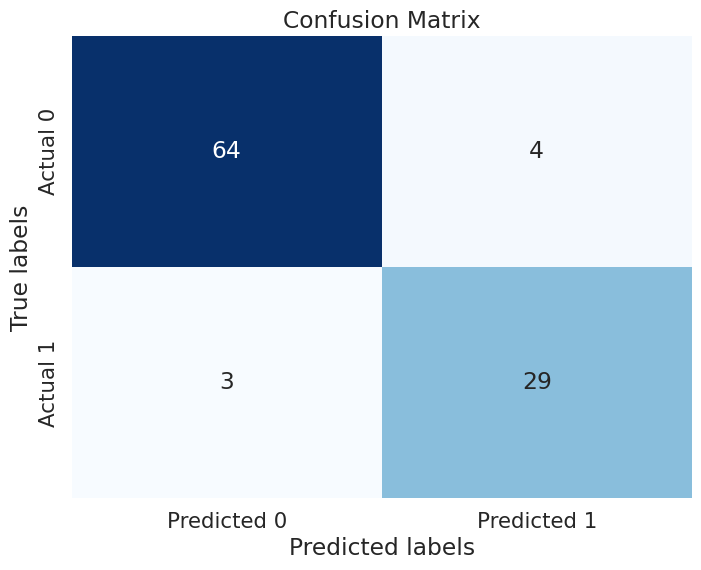

In [157]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [158]:
print("Accuracy =", accuracy_score(Y_test,Y_pred) * 100, "%")

Accuracy = 93.0 %
